# GPR

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor                 
from sklearn.gaussian_process.kernels import RBF,RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared,Matern
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import (RationalQuadratic,Exponentiation)
from sklearn.gaussian_process.kernels import CompoundKernel
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [22]:
Data=pd.read_csv('Result_dataset_130.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head_acceleration]

In [23]:
modo=GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1) ** 2 + WhiteKernel(noise_level=0.5),
                         n_restarts_optimizer=4, normalize_y=True,
                         random_state=0,alpha=4)

# mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)
mod = TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [24]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [25]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (11). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (64). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (90). n_quantiles is set to n_samples.
  warnings.wa

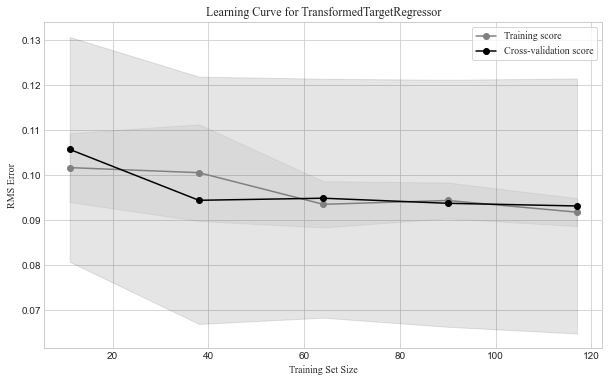

In [27]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
csfont = {'fontname':'Times New Roman'}    
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
# plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color='gray',label="Training score",markeredgecolor='gray')
plt.plot(train_size, test_mean, 'o-', color='k',label="Cross-validation score",markeredgecolor='k')
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='gray',alpha=0.1)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='k', alpha=0.1)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]),**csfont)
plt.xlabel("Training Set Size",**csfont)
plt.ylabel("RMS Error",**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)
plt.show()

In [28]:
pd.DataFrame(test_mean)

,0
0,0.105721
1,0.094433
2,0.094894
3,0.093766
4,0.093174


In [75]:
X = X.to_numpy()
y = y.to_numpy()

In [76]:
y_Test=y_Test.to_numpy()

In [77]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (93). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.151905



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (93). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.151791



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (93). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.149552



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (93). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.162917



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (94). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.202832



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (94). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.244745



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (94). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.134708



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (94). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.266519



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (94). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.336775



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (94). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 0.281937



In [78]:
ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.90515
dtype: float64  error mean --->0    0.21736
Name: mean, dtype: float64  error std --->0    0.196743
Name: std, dtype: float64


# train score

In [79]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.786622
dtype: float64  error mean --->0    0.166689
Name: mean, dtype: float64  error std --->0    0.131121
Name: std, dtype: float64


In [80]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('neck/GPun.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('neck/GPtr.csv')

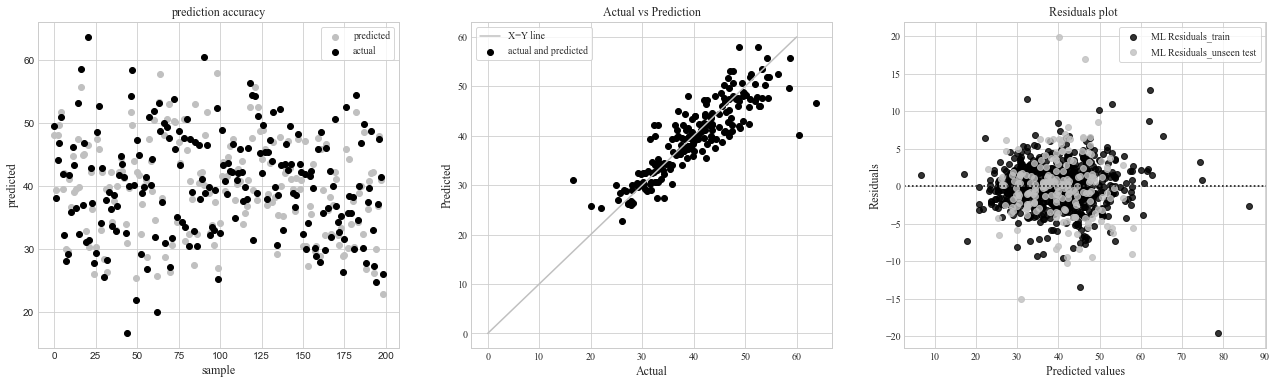

In [49]:
plt.figure(figsize=(22, 6))
plt.style.use('seaborn-whitegrid')
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,color='silver',label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual',color='k')
# plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted',color='k')
plt.plot([0,60],[0,60],color='silver',label='X=Y line')
# plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,3)

plt.show()